In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import sys
from evaluate import test_policy
from evaluate import test_policy_array
from industrialbenchmark.industrial_benchmark_openai.rllab_IB import rllab_IB
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
horizons = [10, 20, 30, 50, 100, 200, 300]

means_all = {}
standard_devs_all = {}
rs_all = {}
for horizon in horizons:
    print("horizon outer {}".format(horizon))
    means = np.zeros(len(horizons))
    standard_devs = np.zeros(len(horizons))
    rs = {}
    totals = {}
    for i, h in enumerate(horizons):
        print("horizon inner {}".format(h))
        rs[h] = []
        results = np.zeros(0)
        for seed in range(10):
            filename = "IB_trpo_snapshots/"
            filename += "horiz" + str(h) + "seed" + str(seed)
            env = rllab_IB(horizon=300)
            res = test_policy(policy_path=filename, horizon=horizon, env=env, policy_itr=990, ntrials=100)
            results = np.append(results, res)
            rs[h].append(np.mean(res))
        means[i] = np.mean(results)
        standard_devs[i] = np.std(results)
    means_all[horizon] = means
    standard_devs_all[horizon] = standard_devs
    rs_all[horizon] = rs



In [ ]:
for test_horizon in sorted(rs_all):
    data = np.zeros((len(horizons), 10))
    for i, h in enumerate(sorted(rs_all[test_horizon])):
        data[i] = rs_all[test_horizon][h]
    plt.boxplot(data.T, labels=horizons)
    plt.xlabel("Horizon that model is optimized for")
    plt.ylabel("Average reward of 10 trained models")
    plt.title("Test horizon is {}".format(test_horizon))
    plt.show()
    

In [ ]:
# for MLP

horizons = [10, 20, 30, 50, 100, 200, 300]

means_all = {}
standard_devs_all = {}
rs_all = {}
for horizon in horizons:
    print("horizon outer {}".format(horizon))
    means = np.zeros(len(horizons))
    standard_devs = np.zeros(len(horizons))
    rs = {}
    totals = {}
    for i, h in enumerate(horizons):
        print("horizon inner {}".format(h))
        rs[h] = []
        results = np.zeros(0)
        for seed in range(10):
            filename = "IB_trpo_snapshots/"
            filename += "horiz" + str(h) + "seed" + str(seed) + "mlp"
            env = rllab_IB(horizon=300)
            res = test_policy(policy_path=filename, horizon=horizon, env=env, policy_itr=600, ntrials=100)
            results = np.append(results, res)
            rs[h].append(np.mean(res))
        means[i] = np.mean(results)
        standard_devs[i] = np.std(results)
    means_all[horizon] = means
    standard_devs_all[horizon] = standard_devs
    rs_all[horizon] = rs




In [ ]:
for test_horizon in sorted(rs_all):
    data = np.zeros((len(horizons), 10))
    for i, h in enumerate(sorted(rs_all[test_horizon])):
        data[i] = rs_all[test_horizon][h]
    plt.boxplot(data.T, labels=horizons)
    plt.xlabel("Horizon that model is optimized for")
    plt.ylabel("Average reward of 10 trained models")
    plt.title("Test horizon is {}".format(test_horizon))
    plt.show()
    

In [ ]:
# for MLP markov state
horizons = [10, 20, 30, 50, 100, 200, 300]

means_all = {}
standard_devs_all = {}
rs_all = {}
for horizon in horizons:
    print("horizon outer {}".format(horizon))
    means = np.zeros(len(horizons))
    standard_devs = np.zeros(len(horizons))
    rs = {}
    totals = {}
    for i, h in enumerate(horizons):
        print("horizon inner {}".format(h))
        rs[h] = []
        results = np.zeros(0)
        for seed in range(10):
            filename = "IB_trpo_snapshots/"
            filename += "horiz" + str(h) + "seed" + str(seed) + "mlpmarkov"
            env = rllab_IB(horizon=300, markov_state=True)
            res = test_policy(policy_path=filename, horizon=horizon, env=env, policy_itr=600, ntrials=100)
            results = np.append(results, res)
            rs[h].append(np.mean(res))
        means[i] = np.mean(results)
        standard_devs[i] = np.std(results)
    means_all[horizon] = means
    standard_devs_all[horizon] = standard_devs
    rs_all[horizon] = rs

In [ ]:
for test_horizon in sorted(rs_all):
    data = np.zeros((len(horizons), 10))
    for i, h in enumerate(sorted(rs_all[test_horizon])):
        data[i] = rs_all[test_horizon][h]
    plt.boxplot(data.T, labels=horizons)
    plt.xlabel("Horizon that model is optimized for")
    plt.ylabel("Average reward of 10 trained models")
    plt.title("Test horizon is {}".format(test_horizon))
    plt.show()

In [ ]:
horizons = [10, 20, 30, 50, 100, 200, 300]
horizon_rewards = np.zeros((len(horizons), 300))
seed_inds = range(10)
for i, horizon in enumerate(horizons):
    print(horizon)
    for seed in seed_inds:
        filename = "IB_trpo_snapshots/"
        filename += "horiz" + str(horizon) + "seed" + str(seed) + "mlp"
        env = rllab_IB(horizon=300, markov_state=False)
        res = test_policy_array(policy_path=filename, horizon=300, env=env, policy_itr=600, ntrials=20)
        horizon_rewards[i] += (np.mean(res, 0) / len(seed_inds))



In [ ]:
plt.plot(horizon_rewards.T)
plt.legend(horizons)
plt.xlabel("T")
plt.ylabel("Reward at time T")
plt.title("Rewards received per time step")


In [3]:
np.random.seed(221860149)
horizons = [20]
exts = ["", "online", "markov", "markovonline"]

rs_all_exts = {} 
for ext in exts:
    means_all = {}
    standard_devs_all = {}
    rs_all = {}
    for horizon in [30]:
        print("horizon outer {}".format(horizon))
        means = np.zeros(len(horizons))
        standard_devs = np.zeros(len(horizons))
        rs = {}
        totals = {}
        for i, h in enumerate(horizons):
            print("horizon inner {}".format(h))
            rs[h] = []
            results = np.zeros(0)
            for seed in range(50):
                if seed % 10 == 0: print(seed)
                filename = "IB_ddpg_snapshots/"
                filename += "horiz" + str(h) + "seed" + str(seed) + ext
                ms = False
                if ext == "markov" or ext == "markovonline":
                    ms = True
                env = rllab_IB(horizon=30, markov_state=ms)
                res = test_policy(policy_path=filename, horizon=horizon, env=env, policy_itr=1000, ntrials=50)
                results = np.append(results, res)
                rs[h].append(np.mean(res))
            means[i] = np.mean(results)
            standard_devs[i] = np.std(results)
        means_all[horizon] = means
        standard_devs_all[horizon] = standard_devs
        rs_all[horizon] = rs
    rs_all_exts[ext] = rs_all 

horizon outer 30
horizon inner 20
0


/home/jeanbetterton/miniconda3/envs/rllab3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


10
20
30
40
horizon outer 30
horizon inner 20
0
10
20
30
40
horizon outer 30
horizon inner 20
0
10
20
30
40
horizon outer 30
horizon inner 20
0
10
20
30
40


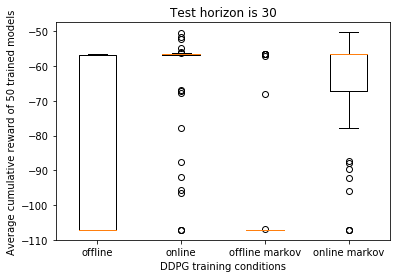

In [4]:
exts = ["", "online", "markov", "markovonline"]
labels = ["offline", "online", 
                "offline markov", "online markov"]

data = np.zeros((len(exts), 50))
for i, ext in enumerate(exts):
    rs_all = rs_all_exts[ext]
    data[i] = rs_all[30][20]
plt.boxplot(data.T, labels=labels)
plt.xlabel("DDPG training conditions")
plt.ylabel("Average cumulative reward of 50 trained models")
plt.title("Test horizon is {}".format(30))
plt.show()
    
    
    

In [8]:
for ext in rs_all_exts:
    m = np.mean(rs_all_exts[ext][30][20])
    print(ext + " " + str(m))

 -90.6636005464
markov -100.198426139
online -63.2414923203
markovonline -64.2980650253


In [14]:
for ext in rs_all_exts:
    m = np.max(rs_all_exts[ext][30][20])
    print(ext + " " + str(m))

 -56.4394313653
markov -56.5399721858
online -50.5993689803
markovonline -50.3300004991


In [9]:
np.random.seed(718020737)
horizons = [20]

means_all = {}
standard_devs_all = {}
rs_all = {}
for horizon in [30]:
    print("horizon outer {}".format(horizon))
    means = np.zeros(len(horizons))
    standard_devs = np.zeros(len(horizons))
    rs = {}
    totals = {}
    for i, h in enumerate(horizons):
        print("horizon inner {}".format(h))
        rs[h] = []
        results = np.zeros(0)
        for seed in range(50):
            if seed % 10 == 0: print(seed)
            filename = "IB_ddpg_snapshots/"
            filename += "horiz" + str(h) + "seed" + str(seed) + "hlayer300"
            env = rllab_IB(horizon=30, markov_state=False)
            res = test_policy(policy_path=filename, horizon=horizon, env=env, policy_itr=1000, ntrials=100)
            results = np.append(results, res)
            rs[h].append(np.mean(res))
        means[i] = np.mean(results)
        standard_devs[i] = np.std(results)
    means_all[horizon] = means
    standard_devs_all[horizon] = standard_devs
    rs_all[horizon] = rs


horizon outer 30
horizon inner 20
0
10
20
30
40


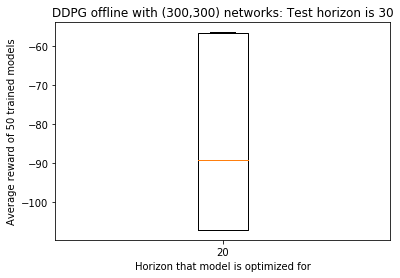

In [10]:
for test_horizon in sorted(rs_all):
    data = np.zeros((len(horizons), 50))
    for i, h in enumerate(sorted(rs_all[test_horizon])):
        data[i] = rs_all[test_horizon][h]
    plt.boxplot(data.T, labels=horizons)
    plt.xlabel("Horizon that model is optimized for")
    plt.ylabel("Average reward of 50 trained models")
    plt.title("DDPG offline with (300,300) networks: Test horizon is {}".format(test_horizon))
    plt.show()

In [11]:
np.mean(rs_all[30][20])

-81.091153524388645

In [13]:
np.max(rs_all[30][20])

-56.450209394572646